In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Conexión a un archivo CSV preprocesado perteneciente a la DB MIMIC-III
# Lectura del archivo CSV en un DataFrame de Pandas
df = pd.read_csv(r'C:\Users\rocio\OneDrive\Escritorio\henry\M6\Clase 01\mimic\modelo.csv')

In [3]:
df.head()

,subject_id,fecha,Arterial BP [Systolic],Arterial Blood Pressure mean,Arterial Blood Pressure systolic,Bicarbonate,"Bilirubin, Total",Creatinine,GCS Total,Heart Rate,Platelet Count,"Potassium, Whole Blood",Respiratory Rate,"Sodium, Whole Blood",Temperature Fahrenheit,Urea Nitrogen,Vancomycin/Random,WBC Count,pO2
0,10006,2164-09-24,NaN,NaN,NaN,27.0,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN
1,10006,2164-09-25,NaN,NaN,NaN,28.0,NaN,7.4,NaN,NaN,168.0,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN
2,10006,2164-09-26,NaN,NaN,NaN,28.0,NaN,8.3,NaN,NaN,152.0,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN
3,10006,2164-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10006,2164-09-28,NaN,NaN,NaN,27.0,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN


In [4]:
# Renombra las columnas del DataFrame
df = df.rename(columns={
    'subject_id': 'paciente',
    'fecha': 'fecha',
    'Arterial BP [Systolic]': 'PAS',
    'Arterial Blood Pressure mean': 'PAM',
    'Arterial Blood Pressure systolic': 'sistolica',
    'Bicarbonate': 'bicarbonato',
    'Bilirubin, Total': 'bilirrubina',
    'Creatinine': 'creatinina',
    'GCS Total': 'GCS',
    'Heart Rate': 'ritmo_cardiaco',
    'Platelet Count': 'plaquetas',
    'Potassium, Whole Blood': 'potasio',
    'Whole Blood': 'sangre_total',
    'Respiratory Rate': 'ritmo_respiratorio',
    'Sodium, Whole Blood': 'sodio',
    'Temperature Fahrenheit': 'temperatura_F',
    'Urea Nitrogen': 'urea',
    'Vancomycin/Random': 'vancomicina',
    'WBC Count': 'glucemia',
    'pO2': 'pO2'
})


In [5]:
#Visualizo
df.head()

,paciente,fecha,PAS,PAM,sistolica,bicarbonato,bilirrubina,creatinina,GCS,ritmo_cardiaco,plaquetas,potasio,ritmo_respiratorio,sodio,temperatura_F,urea,vancomicina,glucemia,pO2
0,10006,2164-09-24,NaN,NaN,NaN,27.0,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN
1,10006,2164-09-25,NaN,NaN,NaN,28.0,NaN,7.4,NaN,NaN,168.0,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN
2,10006,2164-09-26,NaN,NaN,NaN,28.0,NaN,8.3,NaN,NaN,152.0,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN
3,10006,2164-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10006,2164-09-28,NaN,NaN,NaN,27.0,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN


In [6]:
#Verifico si todos los registros son unicos
count = df.nunique()
print(count)

paciente               100
fecha                 1649
PAS                     80
PAM                     58
sistolica               73
bicarbonato             40
bilirrubina            116
creatinina              92
GCS                     14
ritmo_cardiaco          84
plaquetas              456
potasio                 35
ritmo_respiratorio      36
sodio                   18
temperatura_F           68
urea                   135
vancomicina             47
glucemia                 1
pO2                    182
dtype: int64


In [7]:
# Cuenta la cantidad de valores nulos en cada fila del DataFrame
null_counts = df.isnull().sum(axis=1)

# Imprime los resultados
print(null_counts)


0       13
1       13
2       13
3       16
4       14
        ..
1713    12
1714    13
1715    13
1716    13
1717    16
Length: 1718, dtype: int64


In [8]:
#Elimino aquellos registros cuyos nulos sean >60 % (ya que si tiene tantos valores faltantes no me va a servir para entrenar el modelo)

# Define el umbral de valores no nulos
threshold = len(df.columns) * 0.4

# Elimina las filas que no cumplen el umbral de valores no nulos
df = df.dropna(thresh=threshold)


In [9]:
#Corroboro
df.head()

,paciente,fecha,PAS,PAM,sistolica,bicarbonato,bilirrubina,creatinina,GCS,ritmo_cardiaco,plaquetas,potasio,ritmo_respiratorio,sodio,temperatura_F,urea,vancomicina,glucemia,pO2
20,10006,2164-10-23,NaN,NaN,NaN,29.0,1.0,3.0,15.0,104.0,116.0,NaN,25.0,NaN,NaN,9.0,NaN,NaN,NaN
21,10006,2164-10-24,NaN,NaN,NaN,31.0,NaN,3.5,15.0,96.0,106.0,NaN,20.0,NaN,NaN,11.0,21.6,NaN,NaN
22,10006,2164-10-25,NaN,NaN,NaN,29.0,NaN,5.3,15.0,87.0,108.0,NaN,20.0,NaN,NaN,20.0,NaN,NaN,NaN
30,10006,2164-11-16,NaN,NaN,NaN,31.0,NaN,3.2,NaN,NaN,160.0,3.6,NaN,NaN,NaN,7.0,NaN,NaN,94.0
40,10006,2165-03-01,NaN,NaN,NaN,25.0,0.3,8.6,NaN,NaN,166.0,4.8,NaN,NaN,NaN,34.0,NaN,NaN,NaN


In [10]:
# Cuenta la cantidad de valores nulos en cada fila del DataFrame
null_counts = df.isnull().sum(axis=1)

# Imprime los resultados
print(null_counts)

20       9
21       9
22      10
30      11
40      11
        ..
1708     8
1709     8
1710     8
1711    11
1712    11
Length: 584, dtype: int64


In [11]:
#Selecciono pacientes que hayan tenido como mínimo 3 mediciones de signos vitales

# Agrupar por paciente y contar registros no nulos por columna de signos vitales
counts = df.groupby('paciente').agg({'PAS': 'count',
                                       'PAM': 'count',
                                       'bicarbonato': 'count',
                                       'bilirrubina': 'count',
                                       'creatinina': 'count',
                                       'GCS': 'count',
                                       'ritmo_cardiaco': 'count',
                                       'plaquetas': 'count',
                                       'potasio': 'count',
                                       'ritmo_respiratorio': 'count',
                                       'sodio': 'count',
                                       'temperatura_F': 'count',
                                       'urea': 'count',
                                       'glucemia': 'count',
                                       'pO2': 'count'})

# Seleccionar solamente los registros de pacientes con al menos 3 registros de signos vitales
selected_subject_ids = counts[counts['PAS'] >= 3].index

# Filtrar los datos del DataFrame original por los pacientes seleccionados
df_selected = df[df['paciente'].isin(selected_subject_ids)]


In [12]:
#Reemplazo los nulos y NaN que quedaron por la media de cada columna
df.fillna(df.mean(), inplace=True)
df.fillna(value=df.mean(), inplace=True)


C:\Users\rocio\AppData\Local\Temp\ipykernel_18824\393412877.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)
C:\Users\rocio\AppData\Local\Temp\ipykernel_18824\393412877.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(value=df.mean(), inplace=True)


In [13]:
# Cuenta la cantidad de valores nulos en cada fila del DataFrame
null_counts = df.isnull().sum(axis=1)

# Imprime los resultados
print(null_counts)


20      0
21      0
22      0
30      0
40      0
       ..
1708    0
1709    0
1710    0
1711    0
1712    0
Length: 584, dtype: int64


In [14]:
df.head()

,paciente,fecha,PAS,PAM,sistolica,bicarbonato,bilirrubina,creatinina,GCS,ritmo_cardiaco,plaquetas,potasio,ritmo_respiratorio,sodio,temperatura_F,urea,vancomicina,glucemia,pO2
20,10006,2164-10-23,183.237113,76.860294,119.764706,29.0,1.000000,3.0,15.000000,104.000000,116.0,4.041221,25.000000,137.540984,98.180172,9.0,93.003509,3.1,126.520216
21,10006,2164-10-24,183.237113,76.860294,119.764706,31.0,9.406522,3.5,15.000000,96.000000,106.0,4.041221,20.000000,137.540984,98.180172,11.0,21.600000,3.1,126.520216
22,10006,2164-10-25,183.237113,76.860294,119.764706,29.0,9.406522,5.3,15.000000,87.000000,108.0,4.041221,20.000000,137.540984,98.180172,20.0,93.003509,3.1,126.520216
30,10006,2164-11-16,183.237113,76.860294,119.764706,31.0,9.406522,3.2,24.598726,93.028571,160.0,3.600000,19.801917,137.540984,98.180172,7.0,93.003509,3.1,94.000000
40,10006,2165-03-01,183.237113,76.860294,119.764706,25.0,0.300000,8.6,24.598726,93.028571,166.0,4.800000,19.801917,137.540984,98.180172,34.0,93.003509,3.1,126.520216


In [15]:
df.to_csv('df_selected.csv', index=False)

Entrenamiento de modelo de machine learning


Con modelo qSOFA

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Definir la variable objetivo 'sepsis'
df['sepsis'] = ((df['ritmo_cardiaco'] >= 22) & 
                         (df['GCS'] < 15) &
                         (df['PAS'] <= 100)).astype(int)

# Seleccionar los signos vitales relevantes
X = df[['ritmo_cardiaco', 'GCS', 'PAS']]
y = df['sepsis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Train score: {train_score:.3f}, Test score: {test_score:.3f}')

Train score: 1.000, Test score: 1.000


Pruebo el modelo con 3 valores

In [17]:
# Crear un conjunto de características con los signos vitales del paciente
paciente = [[50, 50, 200]]

# Obtener la predicción del modelo
prediccion = model.predict(paciente)

# Imprimir la predicción
print("El paciente tiene sepsis" if prediccion == 1 else "El paciente no tiene sepsis")


El paciente no tiene sepsis


c:\Users\rocio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Meto el modelo en un archivo .pickle para poder hacer un deploy en Gradio + HuggingFace

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import gradio as gr
import pandas as pd
import numpy as np
import pickle

# Leer los datos
df = pd.read_csv("df_selected.csv")

# Definir la variable objetivo 'sepsis'
df['sepsis'] = ((df['ritmo_cardiaco'] >= 22) & 
                         (df['GCS'] < 15) &
                         (df['PAS'] <= 100)).astype(int)

# Seleccionar los signos vitales relevantes
X = df[['ritmo_cardiaco', 'GCS', 'PAS']]
y = df['sepsis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Guardar el modelo entrenado
with open("sepsis_model.pkl", "wb") as f:
    pickle.dump(model, f)


Por último genero un archivo .py que contendrá la una función que llame al modelo guardado para desplegarlo en huggin face

In [19]:
import pandas as pd
import pickle
import gradio as gr

# Cargar el modelo desde un archivo
with open('sepsis_model.pkl', 'rb') as archivo:
    modelo = pickle.load(archivo)

def predict_sepsis(ritmo_cardiaco, GCS, PAS):
    """
    Esta función clasifica si un paciente tiene sepsis o no en base a los valores
    de sus signos vitales: ritmo cardíaco, GCS y PAS.
    
    Args:
    - ritmo_cardiaco (float): Ritmo cardíaco del paciente.
    - GCS (float): Escala de Coma de Glasgow (GCS, por sus siglas en inglés) del paciente.
    - PAS (float): Presión arterial sistólica (PAS) del paciente.
    
    Returns:
    - str: Cadena que indica si el paciente tiene sepsis ('Sí') o no ('No').
    """
    # Crear un DataFrame con los valores de los signos vitales
    data = pd.DataFrame({"ritmo_cardiaco": [ritmo_cardiaco],
                         "GCS": [GCS],
                         "PAS": [PAS]})
    
    # Hacer la predicción de sepsis
    pred = modelo.predict(data)[0]
    
    # Retornar la cadena correspondiente
    if pred == 0:
        return "Negativo"
    else:
        return "Positivo"

# Crear la interfaz de Gradio
inputs = [gr.inputs.Number(label="ritmo_cardiaco"),
          gr.inputs.Number(label="GCS"),
          gr.inputs.Number(label="PAS")]
output = gr.outputs.Textbox(label="Sepsis")

gr.Interface(fn=predict_sepsis, inputs=inputs, outputs=output).launch(share=True)


c:\Users\rocio\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\rocio\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\rocio\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://f6f269ae657cd6f713.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


![Evaluación del modelo](\validacion_modelos.jpg)

Evaluo el modelo de clasificación según: accuracy_Score

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Recall

In [22]:
from sklearn.metrics import recall_score

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Recall: 1.0


Matriz de confusión

In [23]:
from sklearn.metrics import confusion_matrix

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)


Matriz de confusión:
[[112   0]
 [  0   5]]


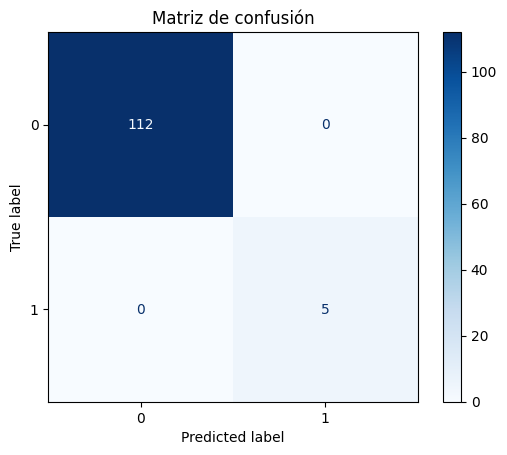

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Matriz de confusión")
plt.show()



Por lo tanto, la matriz de confusión indica que el modelo de árbol de decisión clasificó correctamente 112 muestras que no tenían sepsis (verdaderos negativos) y 5 muestras que sí tenían sepsis (verdaderos positivos). También predijo incorrectamente 0 muestras sin sepsis como positivas (falsos positivos) y 0 muestras con sepsis como negativas (falsos negativos).

El hecho de que no haya falsos positivos o falsos negativos indica que el modelo tiene un rendimiento perfecto en este conjunto de datos de prueba. Esto significa que el modelo fue capaz de clasificar correctamente todas las muestras en el conjunto de prueba. Es importante tener en cuenta que este resultado puede ser inusualmente bueno y que el modelo puede no tener un rendimiento tan bueno en otros conjuntos de datos.

Ajusto el modelo

1) Ajustando los hiperparámetros. En la primer sección utilicé 3 hiperparámetros y en esta segunda sección utilizaré 7 y también modifico la profundidad del árbol en vez de 3 a 7.

Con modelo SOFA, sigo con el Árbol de decisión.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Definir la variable objetivo 'sepsis'
df['sepsis'] =  ((df['ritmo_respiratorio'] > 100) & (df['plaquetas'] <20) & (df['bilirrubina'] > 12) & (df['PAM'] < 70) & (df['GCS'] < 6) & (df['creatinina'] > 5) & (df['pO2'] < 200)).astype(int)     

# Seleccionar los signos vitales relevantes
X = df[['ritmo_cardiaco', 'plaquetas', 'bilirrubina', 'PAM', 'GCS', 'creatinina', 'pO2']]
y = df['sepsis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Train score: {train_score:.3f}, Test score: {test_score:.3f}')
# Guardar el modelo entrenado
with open("sepsis_model_refinado.pkl", "wb") as f:
    pickle.dump(model, f)

Train score: 1.000, Test score: 1.000


In [26]:
import pandas as pd
import pickle
import gradio as gr

# Cargar el modelo desde un archivo
with open('sepsis_model_refinado.pkl', 'rb') as archivo:
    modelo = pickle.load(archivo)

def predict_sepsis(ritmo_cardiaco, plaquetas, bilirrubina, PAM, GCS, creatinina, pO2):
    """
    Esta función clasifica si un paciente tiene sepsis o no en base a los valores
    de sus signos vitales: ritmo cardíaco, GCS y PAS.
    
    Args:
    - ritmo_cardiaco (float): Ritmo cardíaco del paciente.
    - GCS (float): Escala de Coma de Glasgow (GCS, por sus siglas en inglés) del paciente.
    - PAS (float): Presión arterial sistólica (PAS) del paciente.
    
    Returns:
    - str: Cadena que indica si el paciente tiene sepsis ('Sí') o no ('No').
    """
    # Crear un DataFrame con los valores de los signos vitales
    data = pd.DataFrame({"ritmo_cardiaco": [ritmo_cardiaco],
                         "plaquetas":[plaquetas],
                         "bilirrubina":[bilirrubina],
                         "PAM":[PAM],
                         "GCS": [GCS],
                         "creatinina":[creatinina],
                         "pO2": [pO2]})
    
    # Hacer la predicción de sepsis
    pred = modelo.predict(data)[0]
    
    # Retornar la cadena correspondiente
    if pred == 0:
        return "Negativo"
    else:
        return "Positivo"

# Crear la interfaz de Gradio
inputs = [gr.inputs.Number(label="ritmo_cardiaco"),
          gr.inputs.Number(label="plaquetas"),
          gr.inputs.Number(label="bilirrubina"),
          gr.inputs.Number(label="PAM"),
          gr.inputs.Number(label="GCS"),
          gr.inputs.Number(label="creatinina"),
          gr.inputs.Number(label="pO2")]


output = gr.outputs.Textbox(label="Sepsis")

gr.Interface(fn=predict_sepsis, inputs=inputs, outputs=output).launch()

c:\Users\rocio\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\rocio\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\rocio\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Pruebo el modelo

In [27]:
# Crear un conjunto de características con los signos vitales del paciente
paciente = [[200, 300, 1, 100, 15, 1, 0]]

# Obtener la predicción del modelo
prediccion = model.predict(paciente)

# Imprimir la predicción
print("El paciente tiene sepsis" if prediccion == 1 else "El paciente no tiene sepsis")

El paciente no tiene sepsis


c:\Users\rocio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [28]:
# Crear un conjunto de características con los signos vitales del paciente
paciente = [[1, 30 , 15, 80, 5, 6, 100]]

# Obtener la predicción del modelo
prediccion = model.predict(paciente)

# Imprimir la predicción
print("El paciente tiene sepsis" if prediccion == 1 else "El paciente no tiene sepsis")

El paciente no tiene sepsis


c:\Users\rocio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


2) Pruebo validación cruzada con otros modelos:

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Definir la variable objetivo 'sepsis'
df['sepsis'] =  ((df['ritmo_respiratorio'] > 100) & (df['plaquetas'] <20) & (df['bilirrubina'] > 12) & (df['PAM'] < 70) & (df['GCS'] < 6) & (df['creatinina'] > 5) & (df['pO2'] < 200)).astype(int)     

# Seleccionar los signos vitales relevantes
X = df[['ritmo_cardiaco', 'plaquetas', 'bilirrubina', 'PAM', 'GCS', 'creatinina', 'pO2']]
y = df['sepsis']

# Definir los modelos
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)
logistic_model = LogisticRegression(random_state=42)

# Definir los valores para la validación cruzada
cv = KFold(n_splits=10, random_state=42)

# Calcular la precisión de la validación cruzada para cada modelo
tree_scores = cross_val_score(tree_model, X, y, cv=cv)
forest_scores = cross_val_score(forest_model, X, y, cv=cv)
logistic_scores = cross_val_score(logistic_model, X, y, cv=cv)

# Imprimir los resultados de la validación cruzada
print(f'Precisión de árbol de decisión: {tree_scores.mean():.3f} +/- {tree_scores.std():.3f}')
print(f'Precisión de bosque aleatorio: {forest_scores.mean():.3f} +/- {forest_scores.std():.3f}')
print(f'Precisión de regresión logística: {logistic_scores.mean():.3f} +/- {logistic_scores.std():.3f}')




ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.